# Árvore de decisão

Ilustra o funcionamento do algoritmo de árvore de decisão com atributos numéricos

## Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/iris/

3 Classes (setosa, virginica, versicolor)

50 amostras por Classes

4 atributos reais positivos (comp. pétala, com. sépala, larg. pétala, larg. sépala)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

## Carga dos dados e particionamento das bases de treinamento e teste


In [2]:
iris = load_iris()
X, y = iris['data'], iris['target']
class_name = iris['target_names']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.15, random_state=0)

In [3]:
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], 'target'))
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


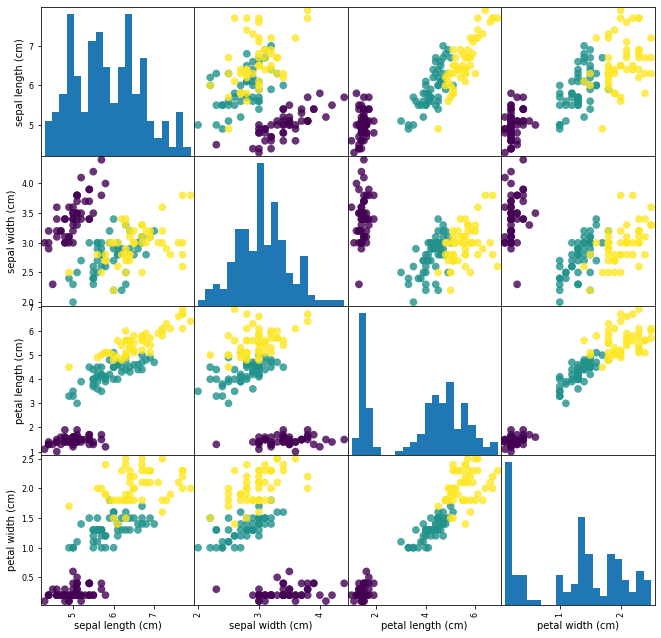

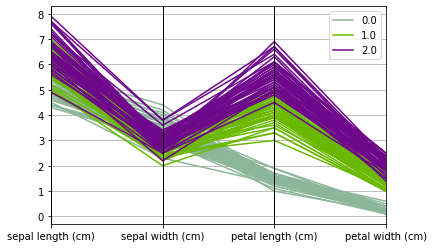

In [9]:
ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:,:4], figsize=(11,11), c=y, marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.figure()
ax3 = pd.plotting.parallel_coordinates(iris_dataframe, 'target')
plt.show()